# <span style="color:purple">Tutorial: </span>

# Retrieving ArcPy Messages and Visualizing ArcPy Outputs

### >>>> DRAFT <<<<

Date: 10-15-2018

Summary: This notebook provides examples for handling ArcPy process messaging and visualization within Jupyter Notebooks. 

# Setup

Import packages (The arcgis.features import is recommended from the API documentation for working with Spatially-enabled Dataframes)

In [1]:
import arcpy
import arcgis
import pandas as pd
from arcgis.features import GeoAccessor, GeoSeriesAccessor
import os

Set reference to sample data

In [2]:
# Path to File Geodatabase containing available data
file_geodatabase = "data//retail.gdb"

# Path to retail business data
businesses_fc = file_geodatabase + "//us_businesses_pittsburgh"
restaurants_fc = file_geodatabase + "//restaurants_pittsburgh"

Connect to a Web GIS

In [3]:
# Connect to ArcGIS Online
gis = arcgis.gis.GIS("https://esrifederal.maps.arcgis.com", username="Anieto_esrifederal")

Enter password: ········


# Handling ArcPy Messaging

Use Density-based Clustering and retrieve tool messages

In [5]:
dbclusters_toolrun = arcpy.stats.DensityBasedClustering(restaurants_fc, 
                                                        "{0}//{1}_HDBSCAN".format(file_geodatabase, "RestaurantClusters02"), 
                                                        "HDBSCAN", 
                                                        5)

The run of the tool can be assigned to a variable as a result object, with properties and methods.

In [6]:
dbclusters_toolrun

<Result 'data\\\\retail.gdb\\RestaurantClusters02_HDBSCAN'>

In [7]:
type(dbclusters_toolrun)

arcpy.arcobjects.arcobjects.Result

Once you have a the result object, you can enter period (".") and TAB to explore the properties and methods of the result object.

![Intellisense](img/intellisense01.png "Intellisense")

One of these methods is ".getMessages". We can use this to retrieve ArcPy tool messages and report them 

In [8]:
print(dbclusters_toolrun.getMessages())

Start Time: Monday, October 15, 2018 9:08:31 PM
Running script DensityBasedClustering...
Number of Clusters 353
Noise features 1161
This tool creates a chart to help explore and interpret the results of the analysis. Charts can be viewed from the List by Charts tab at the top of the Contents pane.
Completed script Density-based Clustering...
Succeeded at Monday, October 15, 2018 9:08:33 PM (Elapsed Time: 1.72 seconds)


The best practice to retrieve all tool messaging is the following:

In [9]:
for i in range(0, dbclusters_toolrun.messageCount):
    print(dbclusters_toolrun.getMessage(i))

Start Time: Monday, October 15, 2018 9:08:31 PM
Running script DensityBasedClustering...
Number of Clusters 353
Noise features 1161
This tool creates a chart to help explore and interpret the results of the analysis. Charts can be viewed from the List by Charts tab at the top of the Contents pane.
Completed script Density-based Clustering...
Succeeded at Monday, October 15, 2018 9:08:33 PM (Elapsed Time: 1.72 seconds)


# Handling ArcPy Symbology (Visualization)

Let's use the result object to retrieve the output of the Density-based Clusters tool run and visualize in the notebook (as much as possible). 

The ".getOutput()" method of the result object helps us use the path of the output data from the tool run. Some tools can produce multiple outputs, so we need to pass an index value to the method as a parameter. Since Density-based Clustering produces one output, we can pass the '0' index value to get the path. 

In [10]:
dbclusters_fc_path = dbclusters_toolrun.getOutput(0)
print(dbclusters_fc_path)

data\\retail.gdb\RestaurantClusters02_HDBSCAN


Let's test a couple approaches to visualize this feature class in this jupyter notebook:

1. Convert the output feature class to a spatially-enabled dataframe, create a map widget, and plot on the map widget.

2. Publish the output to a Web GIS, create a map widget, and plot the published item on the map widget. 

### 1. Convert the output feature class to a spatially-enabled dataframe, create a map widget, and plot on the map widget

Let's convert the output feature class to a spatially-enabled dataframe (i.e. python table with geometry).

In [11]:
dbclusters_sedf = pd.DataFrame.spatial.from_featureclass(dbclusters_fc_path)
dbclusters_sedf

,OBJECTID,SOURCE_ID,CLUSTER_ID,PROB,OUTLIER,EXEMPLAR,STABILITY,COLOR_ID,SHAPE
0,1,1,-1,0.000000,0.027113,0,0.0,-1,"{""x"": -8919964.005570533, ""y"": 4867758.9117359..."
1,2,2,-1,0.000000,0.023014,0,0.0,-1,"{""x"": -8905258.700836735, ""y"": 4865826.0263644..."
2,3,3,-1,0.000000,0.005891,0,0.0,-1,"{""x"": -8905314.36058214, ""y"": 4866727.02381835..."
3,4,4,56,0.173037,0.826963,0,0.0,7,"{""x"": -8904590.783891981, ""y"": 4868224.0230725..."
4,5,5,36,1.000000,0.000000,1,0.0,4,"{""x"": -8896241.822082484, ""y"": 4844052.5717511..."
5,6,6,36,1.000000,0.000000,1,0.0,4,"{""x"": -8895774.28022115, ""y"": 4844531.07518083..."
6,7,7,36,1.000000,0.000000,1,0.0,4,"{""x"": -8894527.501924265, ""y"": 4845430.1438411..."
7,8,8,36,0.790149,0.209851,0,0.0,4,"{""x"": -8893759.397437794, ""y"": 4846532.3388230..."
8,9,9,7,1.000000,0.000000,1,0.0,8,"{""x"": -8894338.258789917, ""y"": 4828101.1194576..."
9,10,10,56,0.357273,0.642727,0,0.0,7,"{""x"": -8890542.26415387, ""y"": 4867729.84300147..."


Create a map widget, centering it in Pittsburgh

In [12]:
# Create map widget
restaurants_map = gis.map("Pittsburgh")
restaurants_map

MapView(layout=Layout(height='400px', width='100%'))

Plot the spatially-enabled dataframe using its ".plot()" method and setting the renderer to unique using the "renderer_type" parameter

In [13]:
dbclusters_sedf.spatial.plot?

In [13]:
dbclusters_sedf.spatial.plot(kind='map',
                             map_widget=restaurants_map,
                             renderer_type='u', # specify the unique value renderer using its notation 'u'
                             col='COLOR_ID'  # column to get unique values from
                            )

True

### 2. Publish the output to a Web GIS, create a map widget, and plot the published item on the map widget. 

Publish the density-based clustering output (in spatially-enabled dataframe format) to the GIS

In [15]:
dbclusters_item = gis.content.import_data(dbclusters_sedf, title="Restaurant Clusters v2", tags="Restaurants; Clusters")
dbclusters_item

<Item title:"Restaurant Clusters v2" type:Feature Layer Collection owner:Anieto_esrifederal>

We need to retrieve the layer from the published item

In [16]:
clusters_layer = dbclusters_item.layers[0]
clusters_layer

<FeatureLayer url:"https://services.arcgis.com/hRUr1F8lE8Jq2uJo/arcgis/rest/services/a3c242/FeatureServer/0">

Let's create another map widget

In [17]:
# Create map widget
restaurants_map2 = gis.map("Pittsburgh")
restaurants_map2

MapView(layout=Layout(height='400px', width='100%'))

Let's add the layer to the map widget

In [18]:
restaurants_map2.add_layer(clusters_layer)

# Using Symbology Layers (.lyr files) with Data on a Hosted Notebook

So far, the only known way to interact with symbology layer files and data produced on a notebook is by leveraging an ArcGIS Pro (or ArcMap) installation on the system executing the notebook cells and publishing from ArcPy to a WebGIS that can then use the symbolized outputs. 

This is a painful workaround, and there may be other ways to work around this (but none that I've found yet). 

The way this process works is as follows:

1. Run the needed tool in the notebook cell.
2. Use an ArcGIS Pro Project or ArcMap MXD to load the output data from the notebook cell. 
3. Apply the .lyr file using ArcPy.
4. Publish the layer as a service to a Web GIS.
5. Retrieve the published item in the notebook.

The following is such an example:

## 1. Run the needed tool in the notebook cell.

In [20]:
hotspots_result_object = arcpy.stats.OptimizedHotSpotAnalysis(restaurants_fc, 
                                                              "{0}//{1}_HotSpots".format(file_geodatabase, "Restaurants"),  
                                                              "SALESVOL")

In [21]:
for i in range(0, hotspots_result_object.messageCount):
    print(hotspots_result_object.getMessage(i))

Start Time: Monday, October 15, 2018 8:07:08 PM
Running script OptimizedHotSpotAnalysis...

************************** Initial Data Assessment ***************************
Making sure there are enough weighted features for analysis....
    - There are 5026 valid input features.

Evaluating the Analysis Field values....
    - SALESVOL Properties:
        Min:           0.0000
        Max:       14035.0000
        Mean:        802.6454
        Std. Dev.:  1130.5548
Looking for locational outliers....
    - There were 88 outlier locations; these will not be used to compute the optimal fixed distance band.

***************************** Scale of Analysis ******************************
Looking for an optimal scale of analysis by assessing the intensity of clustering at increasing distances....
    - The optimal fixed distance band is based on peak clustering found at 5844.2536 Meters

***************************** Hot Spot Analysis ******************************
Finding statistically signifi

In [22]:
hotspots_result_object.getOutput(0)

'data\\\\retail.gdb\\Restaurants_HotSpots'

## 2. Use an ArcGIS Pro Project or ArcMap MXD to load the output data from the notebook cell. 

We need to use an ArcGIS Pro project (or ArcMap MXD). Let's set the path to a project here.

In [23]:
pro_project_path = r"data/pro_project_template/ProProjectTemplate/ProProjectTemplate.aprx"

This symbology layer was previously saved using ArcGIS Pro...

![layer](img/save_lyr.png "save layer")

In [24]:
lyrfile = arcpy.mp.LayerFile(r"symbology/optimizedhotspots_point_symbology.lyrx")
hotspots_symbology_lyr = lyrfile.listLayers()[0]
hotspots_symbology_lyr

Next, we need to use ArcPy's project > map > layer structure to set variables and add our optimized hot spots output as a layer

In [25]:
aprx  = arcpy.mp.ArcGISProject(pro_project_path)
map_obj = aprx.listMaps()[0]

In [26]:
for layer in map_obj.listLayers():
    print(layer.name)

World Topographic Map
World Hillshade


Let's add the layer to the map

In [27]:
map_obj.addLayer(hotspots_symbology_lyr)

In [28]:
for layer in map_obj.listLayers():
    print(layer.name)

OHS_restaurants
World Topographic Map
World Hillshade


In [29]:
hotspots_map_layer = map_obj.listLayers("OHS_restaurants")[0]
hotspots_map_layer

In [30]:
connprop = hotspots_map_layer.connectionProperties

In [34]:
new_conn_properties = {'connection_info': {'database': file_geodatabase},
                       'dataset': 'Restaurants_HotSpots',
                       'workspace_factory': 'File Geodatabase'}

In [35]:
hotspots_map_layer.updateConnectionProperties(hotspots_map_layer.connectionProperties, new_conn_properties)

In [36]:
hotspots_map_layer.connectionProperties

{'connection_info': {'database': 'data//retail.gdb'},
 'dataset': 'Restaurants_HotSpots',
 'workspace_factory': 'File Geodatabase'}

## 3. Publish the layer as a service to a Web GIS.

Create a feature sharing draft object

References:
- http://pro.arcgis.com/en/pro-app/arcpy/sharing/featuresharingdraft-class.htm)
- http://pro.arcgis.com/en/pro-app/tool-reference/server/stage-service.htm

In [37]:
import os

# Set output file names
outdir = r"data\publishing"
service = "OHS_restaurants"
sddraft_filename = service + ".sddraft"
sddraft_output_filename = os.path.join(outdir, sddraft_filename)

Create SharingDraft and set service properties

In [38]:
# Create SharingDraft and set service properties
feature_sharingdraft_obj = map_obj.getWebLayerSharingDraft(server_type='MY_HOSTED_SERVICES', 
                                                           service_type='FEATURE', 
                                                           service_name=service)

feature_sharingdraft_obj.description = "Optimized Hot Spots results for restaurants in Pittsburgh, PA"
feature_sharingdraft_obj.tags = "Optimized Hot Spots"
feature_sharingdraft_obj.summary = "My Summary"

Create Service Definition Draft File

In [39]:
feature_sharingdraft_obj.exportToSDDraft(sddraft_output_filename)

Stage Service

In [ ]:
sd_filename = service + ".sd"
sd_output_filename = os.path.join(outdir, sd_filename)
arcpy.StageService_server(sddraft_output_filename, sd_output_filename)

In [ ]:
# Share to portal
print("Uploading Service Definition...")
arcpy.UploadServiceDefinition_server(sd_output_filename, "My Hosted Services")

## 4. Retrieve the published item in the notebook.

In [48]:
hotspots_map = gis.map("Pittsburgh")
hotspots_map

MapView(layout=Layout(height='400px', width='100%'))

<Item title:"OHS_restaurants" type:Feature Layer Collection owner:albe9057@esri.com_esrifederal>
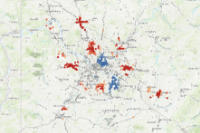

In [49]:
hotspots_published_item = gis.content.search("OHS_restaurants", item_type="Feature Service")[1]
hotspots_published_item

In [50]:
hotspots_map.add_layer(hotspots_published_item)

## Appendix: Renderer Testing (In Progress)

In [53]:
renderer = hotspots_map_layer.symbology.renderer

In [54]:
renderer

<graduated_colors_renderer object>

In [55]:
hot_spots_map = gis.map("Pittsburgh")
hot_spots_map

MapView(layout=Layout(height='400px', width='100%'))

<Item title:"OHS_restaurants_notsymbolized" type:Feature Layer Collection owner:albe9057@esri.com_esrifederal>
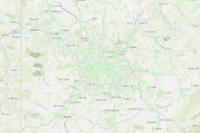

In [58]:
hot_spots_item = gis.content.search("OHS_restaurants_notsymbolized", item_type="Feature Service")[0]
hot_spots_item

In [59]:
hot_spots_map.add_layer(hot_spots_item)